# Credit Card customers : Predict Churning customers (data from kaggle)

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction


In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv('BankChurners.csv')

In [139]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [140]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],axis=1,inplace=True)
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)

In [141]:
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [102]:
df.isnull().sum()
#เช็คว่า columnใดมีข้อมูลว่างบ้าง

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Exploratory Data Analysis (Shortly)

อัตราส่วน ลูกค้าที่ที่ยังใช้บริการ : ลูกค้าที่ยุติการใช้บริการ

In [103]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

([<matplotlib.patches.Wedge at 0x19b8fd69850>,
 [Text(-0.9628371444551311, 0.5319254019667504, 'Existing Customer'),
  Text(0.9628371693563555, -0.5319253568930898, 'Attrited Customer')],
 [Text(-0.525183896975526, 0.29014112834550015, '83.93%'),
  Text(0.5251839105580121, -0.2901411037598671, '16.07%')])

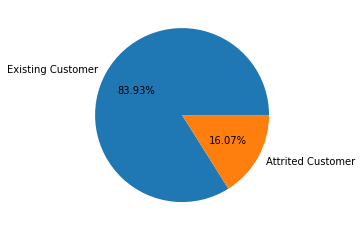

In [104]:
fig,axes = plt.subplots(nrows=1,ncols=1)
axes.pie(df['Attrition_Flag'].value_counts(),labels=['Existing Customer', 'Attrited Customer'],autopct='%.2f%%')

ช่วงอายุของ Existing customer และ Attried Customer

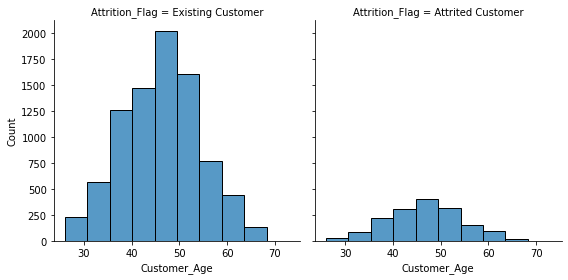

In [105]:
sns.displot(x='Customer_Age',data=df,col='Attrition_Flag',bins=10,height=4)

ช่วงรายได้ของ Existing customer และ Attried Customer

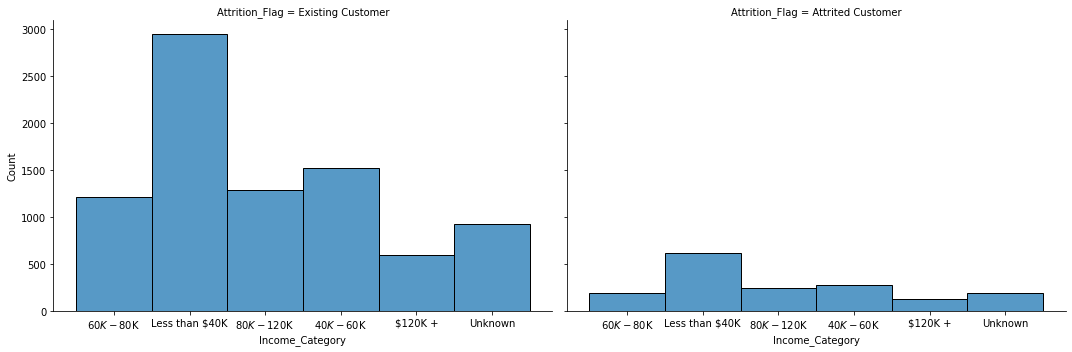

In [106]:
sns.displot(x='Income_Category',data=df,col='Attrition_Flag',bins=10,aspect=1.5)

ช่วงรายได้ของสมาชิกในแต่ละประเภท Card

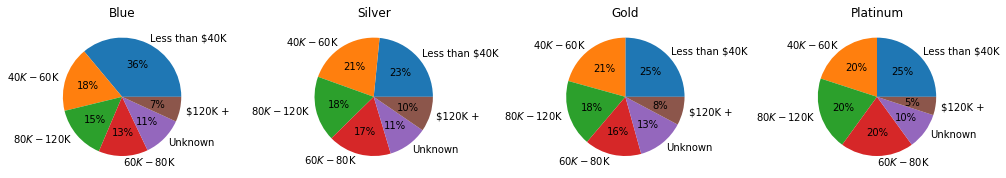

In [107]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(14,7))
axes[0].set_title('Blue')
axes[1].set_title('Silver')
axes[2].set_title('Gold')
axes[3].set_title('Platinum')
axes[0].pie(df['Income_Category'][df['Card_Category']=='Blue'].value_counts(),labels=df['Income_Category'].value_counts().index,autopct='%.0f%%')
axes[1].pie(df['Income_Category'][df['Card_Category']=='Silver'].value_counts(),labels=df['Income_Category'].value_counts().index,autopct='%.0f%%')
axes[2].pie(df['Income_Category'][df['Card_Category']=='Gold'].value_counts(),labels=df['Income_Category'].value_counts().index,autopct='%.0f%%')
axes[3].pie(df['Income_Category'][df['Card_Category']=='Platinum'].value_counts(),labels=df['Income_Category'].value_counts().index,autopct='%.0f%%')
plt.tight_layout()

In [108]:
df.groupby('Card_Category')['Income_Category'].value_counts()*100/df.groupby('Card_Category')['Income_Category'].count()

Card_Category  Income_Category
Blue           Less than $40K     36.064010
               $40K - $60K        17.751166
               $80K - $120K       14.783807
               $60K - $80K        13.490886
               Unknown            11.074608
               $120K +             6.835524
Gold           $60K - $80K        25.000000
               Less than $40K     20.689655
               $80K - $120K       18.103448
               $120K +            15.517241
               $40K - $60K        12.931034
               Unknown             7.758621
Platinum       Unknown            25.000000
               $120K +            20.000000
               $60K - $80K        20.000000
               Less than $40K     20.000000
               $80K - $120K       10.000000
               $40K - $60K         5.000000
Silver         Less than $40K     23.423423
               $80K - $120K       21.081081
               $40K - $60K        17.837838
               $60K - $80K        17.297297
 

correlation ของ variables

<AxesSubplot:>

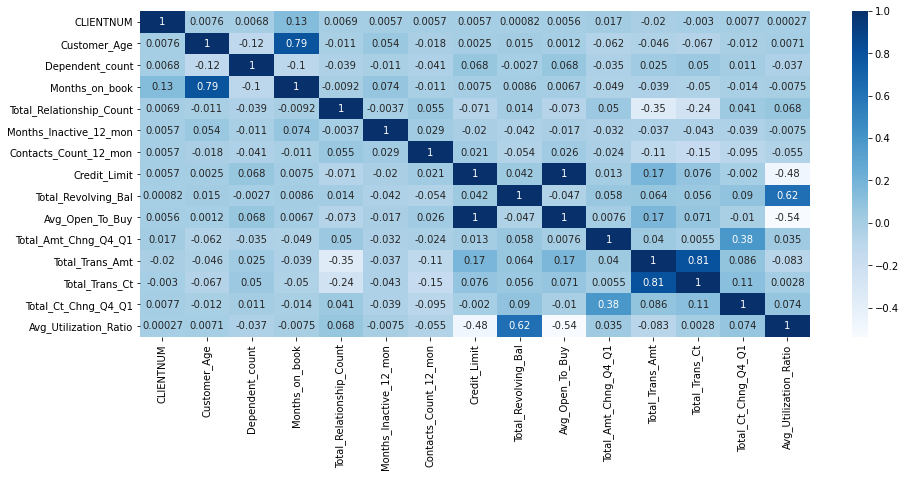

In [116]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

แปลงตัวแปรเป็น dummy เพื่อสร้าง predict model

In [129]:
df = pd.get_dummies(data=df,columns=['Card_Category'],drop_first=True)
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0


In [130]:
df = pd.get_dummies(data=df,columns=['Income_Category'],drop_first=True)
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,768805383,Existing Customer,45,M,3,High School,Married,39,5,1,...,1.625,0.061,0,0,0,0,1,0,0,0


In [131]:
df = pd.get_dummies(data=df,columns=['Gender'],drop_first=True)
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Utilization_Ratio,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Gender_M
0,768805383,Existing Customer,45,3,High School,Married,39,5,1,3,...,0.061,0,0,0,0,1,0,0,0,1


In [132]:
df = pd.get_dummies(data=df,columns=['Education_Level'],drop_first=True)
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown
0,768805383,Existing Customer,45,3,Married,39,5,1,3,12691.0,...,0,0,0,1,0,0,1,0,0,0


In [133]:
df = pd.get_dummies(data=df,columns=['Marital_Status'],drop_first=True)
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,Existing Customer,45,3,39,5,1,3,12691.0,777,...,1,0,0,1,0,0,0,1,0,0


# Build predict model

In [134]:
from sklearn.model_selection import train_test_split
X = df.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y = df['Attrition_Flag']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [135]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_rfc = rfc.predict(X_test)

In [136]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_rfc))
print(classification_report(y_test,y_rfc))

[[ 388   98]
 [  30 2523]]
                   precision    recall  f1-score   support

Attrited Customer       0.93      0.80      0.86       486
Existing Customer       0.96      0.99      0.98      2553

         accuracy                           0.96      3039
        macro avg       0.95      0.89      0.92      3039
     weighted avg       0.96      0.96      0.96      3039

